In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

2025-03-21 23:47:00.926209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742581020.940296   28631 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742581020.944713   28631 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-21 23:47:00.960873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Funcitonal API 

In [34]:
x1 = Input(shape = (128, 128, 3))
x2 = Input(shape = (128,128,3))

In [35]:
x_1 = Dense(128, activation = 'relu')(x1)
x_1 = Dense(128, activation = 'relu')(x_1)
x_1 = Dense(128, activation = 'relu')(x_1)

x_2 = Dense(64, activation = 'relu')(x2)
x_2 = Dense(64, activation = 'relu')(x2)

concat = concatenate([x_1, x_2]) # used for the concatenation of the two models

hidden_1 = Dense(64, activation = 'relu')(concat)
hidden_2 = Dense(64, activation = 'relu')(hidden_1)

output_1 = Dense(1, activation = 'linear')(hidden_2) # used for the linear regression task
output_2 = Dense(1, activation = 'sigmoid')(hidden_2) # used for the binary classification task in the model with different outputs need 

In [36]:
model = Model(inputs = x , outputs = [output_1, output_2] )

In [37]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128, 128,  │        512 │ input_layer_1[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 128, 128,  │     16,512 │ dense_16[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128, 128,  │     16,512 │ dense_17[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128, 128,  │        256 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128, 128,  │          0 │ dense_18[0][0],   │
│ (Concatenate)       │ 192)              │            │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 128, 128,  │     12,352 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 128, 128,  │      4,160 │ dense_21[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 128, 128,  │         65 │ dense_22[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 128, 128,  │         65 │ dense_22[0][0]    │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 50,434 (197.01 KB)

 Trainable params: 50,434 (197.01 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.utils import plot_model

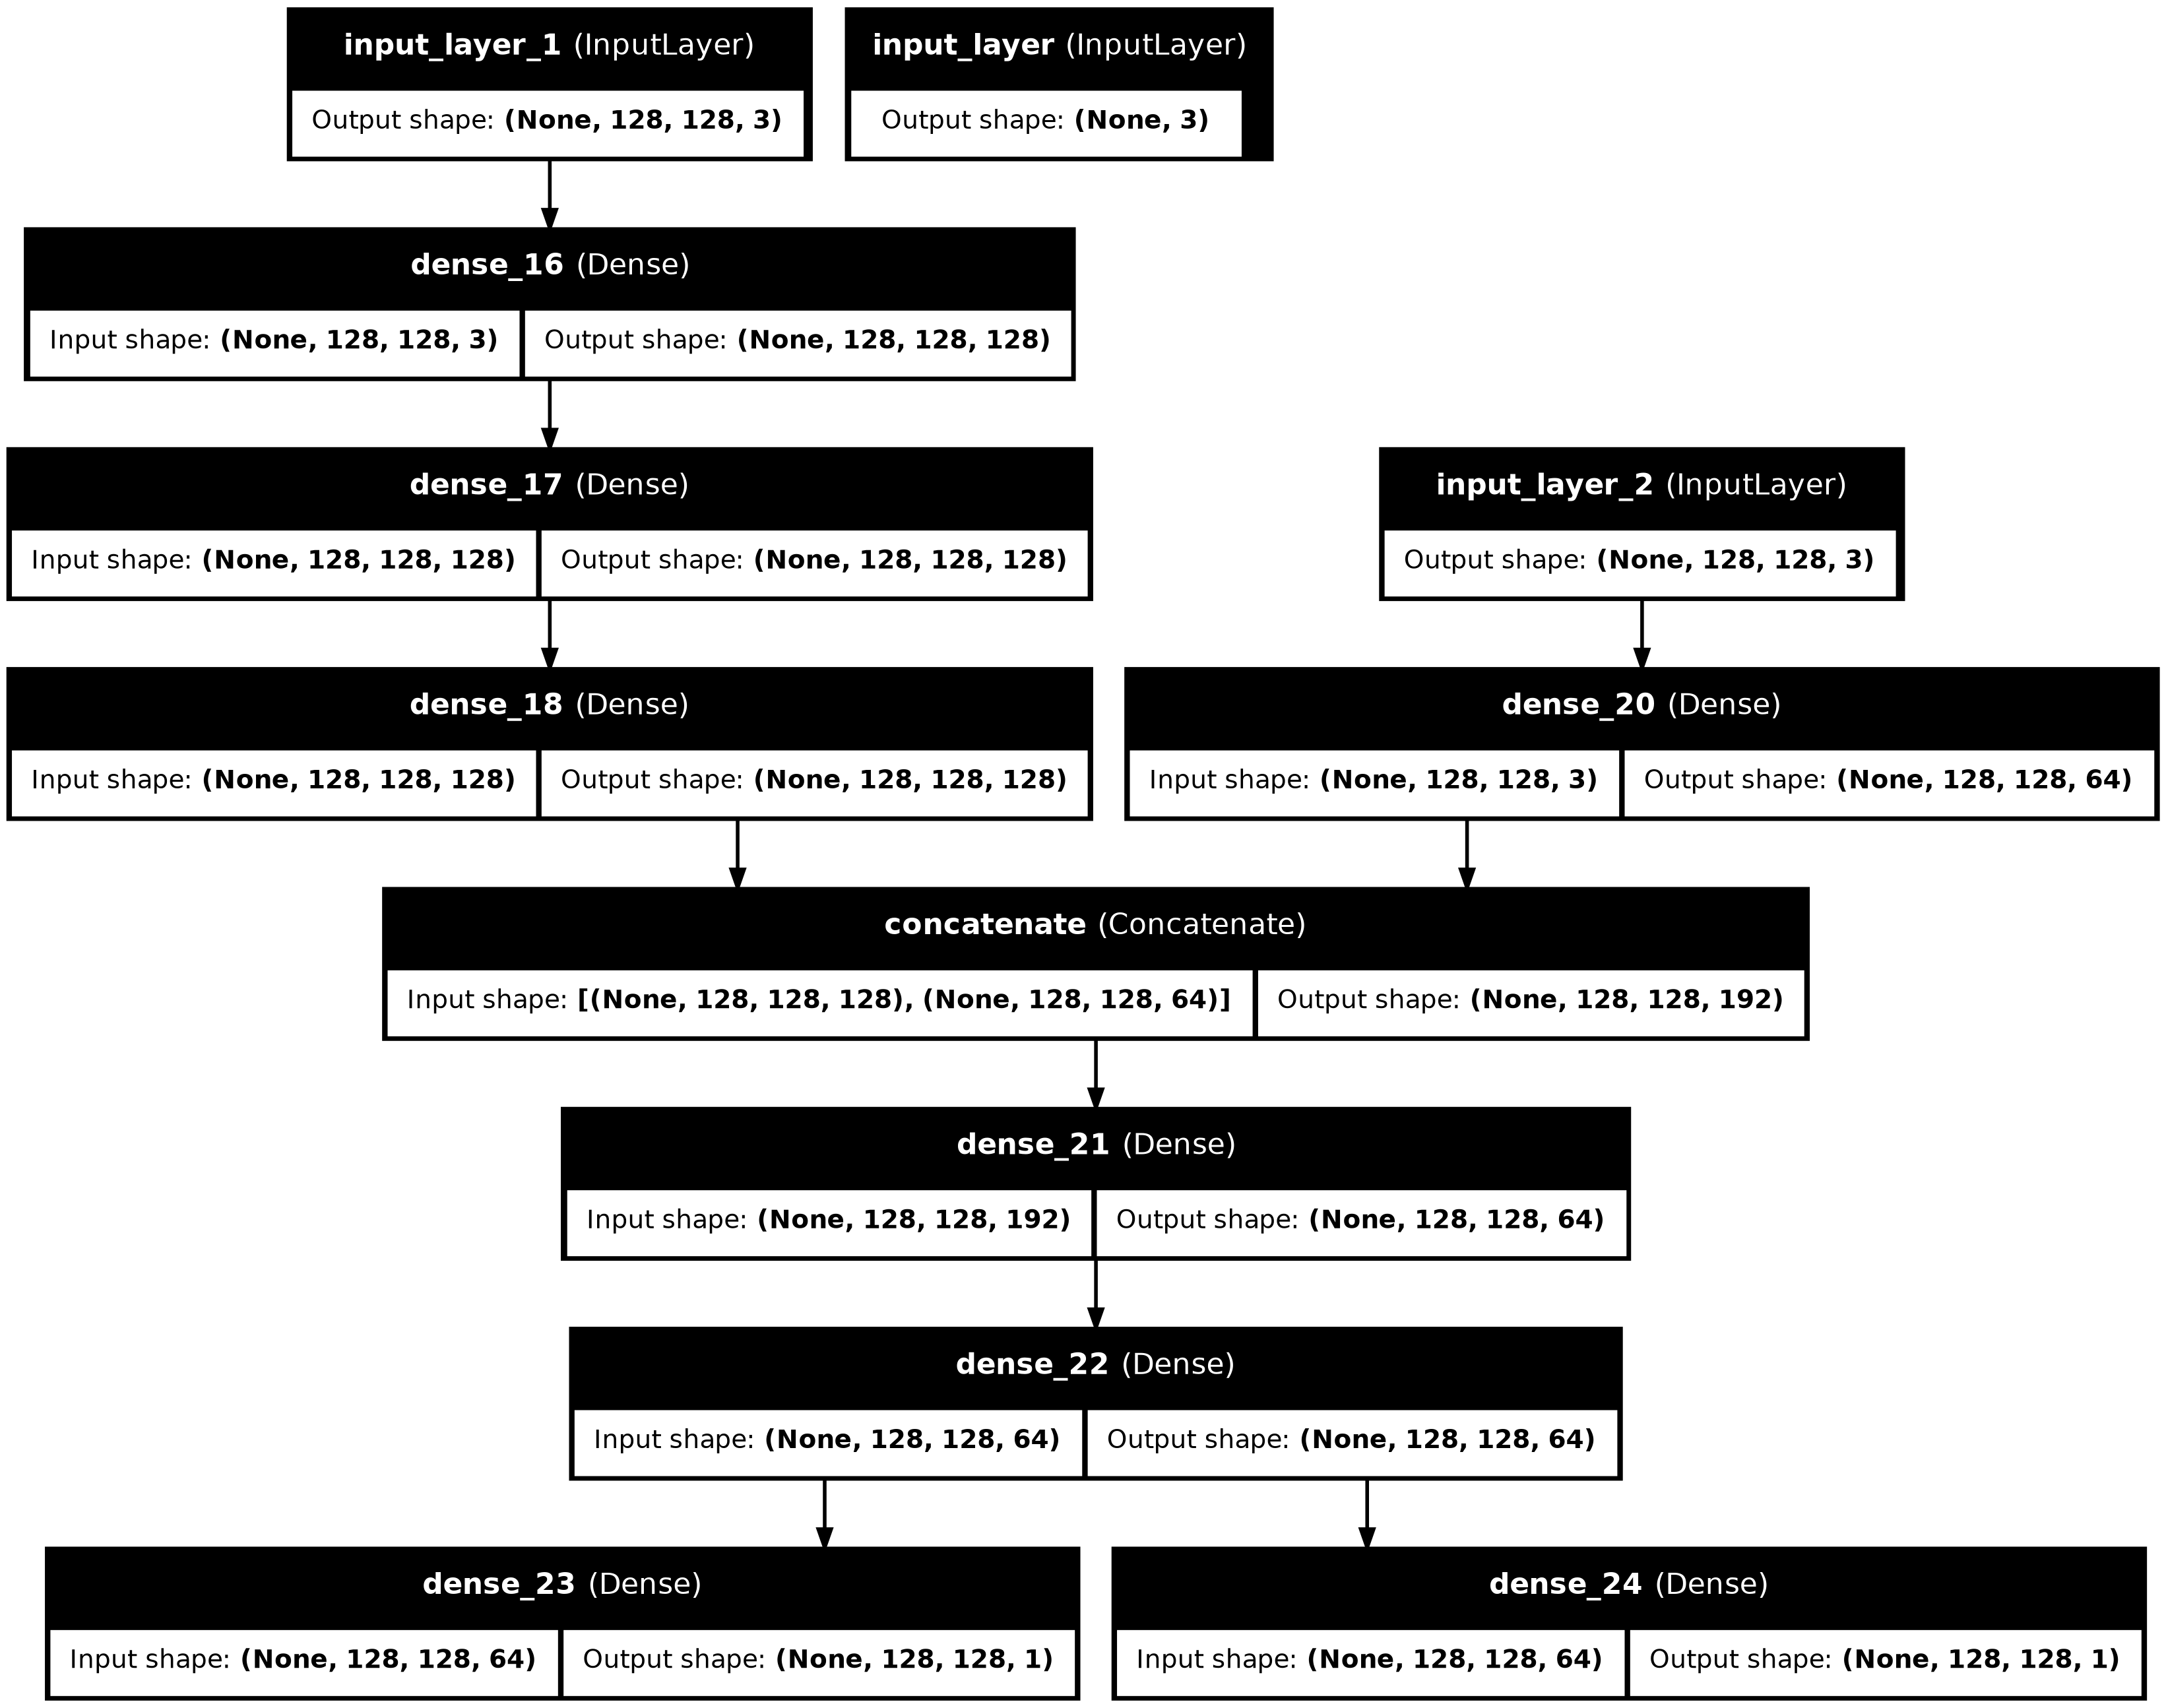

In [39]:
plot_model(model, show_shapes=True, show_layer_names=True)